## Visualizing Results from Tennis Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from kalman import KalmanFilter

In [2]:
wd = 'results/'
with open(wd + 'frame6_balls.txt') as f:
    lines = f.readlines()
    print(lines)

['ball_no_0: coords (1634, 368), size 113x113\n']


Preparing data

In [3]:
def get_coords(line):
    openn = line.find('(')
    close = line.find(')')
    delim = line.find(',')
    return int(line[openn+1:delim]), int(line[delim+2:close])

In [4]:
with open(wd + 'frame6_balls.txt') as f:
    lines = f.readlines()
    print(lines)
    if len(lines) > 0:
        print(get_coords(lines[0]))

['ball_no_0: coords (1634, 368), size 113x113\n']
(1634, 368)


In [5]:
a = np.empty(200, dtype='object')
for i in range(200):
    try:
        with open(wd + 'frame' + str(i) + '_balls.txt') as f:
            lines = f.readlines()
            if len(lines) > 0:
                a[i] = (get_coords(lines[0]))
    except:
        continue

In [6]:
b = []
buffer = 2
for i in range(len(a)):
    if a[i] != None:
        if buffer > 0:
            buffer -= 1
        else:
            b.append(a[i])
        

Displaying recorded data that has relatively little noise/few outliers

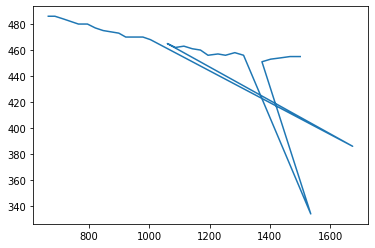

In [7]:
c = []
for i in range(30):
    c.append(list(b[i]))
c = np.asarray(c)
c
plt.plot(c[:, 0], c[:, 1])
plt.show()

In [8]:
x_init = np.zeros(6)
P_init = np.diag(np.full(6, 500))
R_init = np.array([[9,0],[0,9]])
kf = KalmanFilter(1, x_init, P_init, R_init, 0.2**2, gain=1.)

/home/conor/Homework/csci4831/yolo-hand-detection/kalman/kalman.py:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  [0, 0, 0, t**2/2, t, 1]


In [9]:
d = []
for i in range(len(c)):
    d.append(kf.run(c[i]))
d = np.asarray(d)
    

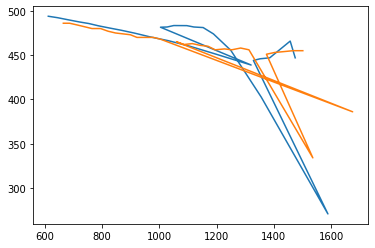

In [10]:
plt.plot(d[:, 0], d[:, 1])
plt.plot(c[:, 0], c[:, 1])
plt.show()
# icky

Despite the only two outliers, there is still massive disruption of our filter due to these outliers (which are false observations)

In [11]:
c

array([[1501,  455],
       [1467,  455],
       [1436,  454],
       [1403,  453],
       [1374,  451],
       [1536,  334],
       [1313,  456],
       [1284,  458],
       [1253,  456],
       [1228,  457],
       [1195,  456],
       [1170,  460],
       [1143,  461],
       [1115,  463],
       [1087,  462],
       [1060,  465],
       [1675,  386],
       [1004,  468],
       [ 979,  470],
       [ 952,  470],
       [ 922,  470],
       [ 899,  473],
       [ 873,  474],
       [ 847,  475],
       [ 821,  477],
       [ 795,  480],
       [ 765,  480],
       [ 714,  484],
       [ 687,  486],
       [ 665,  486]])

In [12]:
x_init = np.zeros(6)
P_init = np.diag(np.full(6, 500))
R_init = np.array([[9,0],[0,9]])
kf = KalmanFilter(1, x_init, P_init, R_init, 0.2**2, gain=1.)
pred = None
for i in range(5):
    pred = kf.run(c[i])
c[5] = list(pred)
for i in range(6,16):
    pred = kf.run(c[i])
c[16] = list(pred)

/home/conor/Homework/csci4831/yolo-hand-detection/kalman/kalman.py:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  [0, 0, 0, t**2/2, t, 1]


Manually removing false observations (above).

In [13]:
d = np.asarray(c)
x_init = np.zeros(6)
P_init = np.diag(np.full(6, 500))
R_init = np.array([[9,0],[0,9]])
kf = KalmanFilter(1, x_init, P_init, R_init, 0.2**2, gain=1.)
e = []
for i in range(d.shape[0]):
    e.append(list(kf.run(d[i])))
e = np.asarray(e)

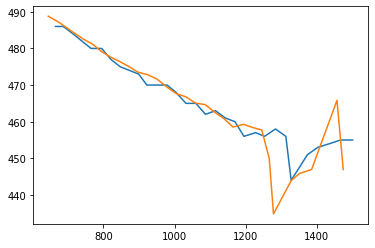

In [14]:
plt.plot(d[:, 0], d[:, 1])
plt.plot(e[:, 0], e[:, 1])
plt.show()

Above shows how our filter is accurately tracking and predicting the ground truth data up until the point of greater uncertainty and imprecise fluxuations of the ground truth.